# WEEK-14 Homework Assignment

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series 
of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval
length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data.


The  CalCOFI organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California.
CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on 
station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, 
nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton 
biomass, and zooplankton biodiversity.

Resource: https://www.kaggle.com/sohier/calcofi

1.	Perform pre-processing on the full dataset here: https://www.kaggle.com/sohier/calcofi 
        
2.	Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

3.	Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown. 

4.	Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

5.	Work with the diabetes dataset to perform multiple logistic regression. 

6.	What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why? 

7.	Tune your model to improve performance based on the performance metric you identified in question 6. Look at the documentation for logistic regression in statsmodel and/or sklearn and see if you can tune the model performance based on available parameters. Please note: data scientists need to constantly learn new approaches to optimizing models. This is one way of doing that.
    
8.	Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell? 


In [153]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [9]:
cast_df=pd.read_csv("A:/launch_code_STL/Final_Homework/week-13/cast.csv", index_col=False, low_memory=False)

In [96]:
bottle_df = pd.read_csv("A:/launch_code_STL/Final_Homework/week-13/bottle.csv", index_col=False, low_memory=False )

### Data Preprocessing: 
Preparing Data for modeling

In [97]:
bottle_df.shape

(864863, 74)

In [98]:
bottle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [99]:
#checking for variable types
bottle_df.dtypes.value_counts()

float64    65
int64       5
object      4
dtype: int64

In [100]:
# Numerical data
bottle_df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [101]:
# include=['O'] pulls out the objects dtypes attributes from our data 
bottle_df.describe(include=['O'])  #Categorical data

,Sta_ID,Depth_ID,IncTim,DIC Quality Comment
count,864863,864863,14437,55
unique,2634,864850,199,37
top,090.0 045.0,20-16045S-MX-110-2018-06330900-0010A-3,12/30/1899 05:45:00,CTD Bottle Misfire; DIC sample compromised. C...
freq,10043,2,325,9


In [102]:
# checking for the columns in Bottle Dataset
print(bottle_df.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [103]:
#Counts and percentage of null values 
dictionary = {
    "NullCount":bottle_df.isnull().sum().sort_values(ascending=False),
    "NullPercent":bottle_df.isnull().sum().sort_values(ascending=False)/len(bottle_df)*100
}

na_df = pd.DataFrame(dictionary)
na_df.columns = ['NullCount','NullPercent']
na_df[(na_df['NullCount'] > 0)].reset_index()

,index,NullCount,NullPercent
0,pH2,864853,99.998844
1,DIC Quality Comment,864808,99.993641
2,pH1,864779,99.990287
3,DIC2,864639,99.974100
4,TA2,864629,99.972944
...,...,...,...
61,C14A1q,16258,1.879835
62,C14A2q,16240,1.877754
63,R_TEMP,10963,1.267600
64,T_prec,10963,1.267600


In [104]:
pct_null = bottle_df.isnull().sum() / len(bottle_df)
missing_features = pct_null[pct_null > 0.20].index
bottle_df.drop(missing_features, axis=1, inplace=True)
df = bottle_df
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,...,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_PRES
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,3,...,9.0,0.0,10.50,10.50,33.440,25.64,233.0,0.00,NaN,0
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,3,...,9.0,8.0,10.46,10.46,33.440,25.65,232.5,0.01,NaN,8
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,7,...,9.0,10.0,10.46,10.46,33.437,25.65,232.8,0.02,NaN,10
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,3,...,9.0,19.0,10.45,10.45,33.420,25.64,234.1,0.04,NaN,19
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,7,...,9.0,20.0,10.45,10.45,33.421,25.64,234.0,0.04,NaN,20


In [105]:
print(df.nunique() / df.shape[0] * 100 )

Cst_Cnt         3.977971
Btl_Cnt       100.000000
Sta_ID          0.304557
Depth_ID       99.998497
Depthm          0.372198
T_degC          1.601063
Salnty          1.688360
O2ml_L          0.751564
STheta          4.205059
RecInd          0.000578
T_prec          0.000347
S_prec          0.000231
NH3q            0.000231
C14A1q          0.000231
C14A2q          0.000231
DarkAq          0.000231
MeanAq          0.000231
R_Depth         0.372198
R_TEMP          0.325948
R_POTEMP        0.330341
R_SALINITY      0.414401
R_SIGMA         0.508520
R_SVA           0.607495
R_DYNHT         0.213675
R_O2            0.100710
R_PRES          0.384801
dtype: float64


In [106]:
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'RecInd', 'T_prec', 'S_prec', 'NH3q',
       'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq', 'R_Depth', 'R_TEMP', 'R_POTEMP',
       'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_DYNHT', 'R_O2', 'R_PRES'],
      dtype='object')

In [107]:
df.dtypes

Cst_Cnt         int64
Btl_Cnt         int64
Sta_ID         object
Depth_ID       object
Depthm          int64
T_degC        float64
Salnty        float64
O2ml_L        float64
STheta        float64
RecInd          int64
T_prec        float64
S_prec        float64
NH3q          float64
C14A1q        float64
C14A2q        float64
DarkAq        float64
MeanAq        float64
R_Depth       float64
R_TEMP        float64
R_POTEMP      float64
R_SALINITY    float64
R_SIGMA       float64
R_SVA         float64
R_DYNHT       float64
R_O2          float64
R_PRES          int64
dtype: object

In [108]:
# Removing the missing values
# print(df.dropna())
df_new=df.dropna()
df_new

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,RecInd,...,MeanAq,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_PRES
2160,71,2161,044.0 048.5,19-4904CR-HY-087-0606-04400485-0000B-3,0,10.300,33.0300,5.900,25.36400,3,...,9.0,0.0,10.30,10.30,33.030,25.360,260.2,0.000,5.90,0
2162,71,2163,044.0 048.5,19-4904CR-HY-087-0606-04400485-0010A-7,10,10.290,32.9510,6.040,25.30400,7,...,9.0,10.0,10.29,10.29,32.951,25.300,266.1,0.020,6.04,10
2163,71,2164,044.0 048.5,19-4904CR-HY-087-0606-04400485-0015A-3,15,10.290,32.9900,6.060,25.33500,3,...,9.0,15.0,10.29,10.29,32.990,25.330,263.3,0.040,6.06,15
2164,71,2165,044.0 048.5,19-4904CR-HY-087-0606-04400485-0020A-7,20,10.330,33.0050,6.040,25.33900,7,...,9.0,20.0,10.33,10.33,33.005,25.330,262.9,0.050,6.04,20
2165,71,2166,044.0 048.5,19-4904CR-HY-087-0606-04400485-0030A-7,30,10.390,33.0540,6.010,25.36800,7,...,9.0,30.0,10.39,10.39,33.054,25.360,260.4,0.070,6.01,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864855,34403,864856,093.3 120.0,20-1611SR-MX-313-2053-09331200-0440A-3,440,6.312,34.1563,0.718,26.85639,3,...,9.0,440.0,6.31,6.27,34.156,26.856,125.3,1.026,0.72,444
864856,34403,864857,093.3 120.0,20-1611SR-MX-313-2053-09331200-0500A-7,500,5.993,34.2160,0.456,26.94518,7,...,9.0,500.0,5.99,5.95,34.216,26.945,117.5,1.107,0.46,504
864857,34403,864858,093.3 120.0,20-1611SR-MX-313-2053-09331200-0521A-3,521,5.818,34.2382,0.366,26.98477,3,...,9.0,521.0,5.82,5.77,34.238,26.985,113.9,1.123,0.37,525
864859,34404,864860,093.4 026.4,20-1611SR-MX-310-2239-09340264-0002A-3,2,18.744,33.4083,5.805,23.87072,3,...,9.0,2.0,18.74,18.74,33.408,23.871,402.5,0.008,5.81,2


In [109]:
# check if any duplicates are present in the data
print('COUNT OF DUPLICATES:  {}'.format(df_new.duplicated().sum()))

COUNT OF DUPLICATES:  0


2. Perform feature selection (decide what columns should be included in your analysis). How did you figure out what features were important?

In [51]:
# Feature Selection is a method of selecting features from the data and help in  improving the model performance.
# its very important to understand the dataset before using it to train the model.
# Feature selection helps to get rid of noise in the model and also redundant fratures that are adding noise, and features that 
# are strongly correlated, which breaks the assumptions of certain models and thus impact model performance.

In [110]:
# After removing the missing data we are left with only 26 rows. Out of these 26 rows there are some features that are repeats 
# for example T_Prec and S_Prec are the units of Temperature and salinity, in the same way we have redundant features like, 
# R_Depth, R_TEMP, R_POTEMP, R_SALINITY, R_SIGMA, R_SVA, R_O2 which are all falls under repeats and we need to get rid of all 
# these redundant features, to do that we need to drop all these features which are adding noise.

# feature_df = df_new.drop(['RecInd', 'T_prec', 'S_prec', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_O2'], axis=1)


feature_df = df_new.drop(columns=['RecInd', 'T_prec', 'S_prec', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA', 'R_SVA', 'R_O2'])
print(feature_df)

        Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
2160         71     2161  044.0 048.5  19-4904CR-HY-087-0606-04400485-0000B-3   
2162         71     2163  044.0 048.5  19-4904CR-HY-087-0606-04400485-0010A-7   
2163         71     2164  044.0 048.5  19-4904CR-HY-087-0606-04400485-0015A-3   
2164         71     2165  044.0 048.5  19-4904CR-HY-087-0606-04400485-0020A-7   
2165         71     2166  044.0 048.5  19-4904CR-HY-087-0606-04400485-0030A-7   
...         ...      ...          ...                                     ...   
864855    34403   864856  093.3 120.0  20-1611SR-MX-313-2053-09331200-0440A-3   
864856    34403   864857  093.3 120.0  20-1611SR-MX-313-2053-09331200-0500A-7   
864857    34403   864858  093.3 120.0  20-1611SR-MX-313-2053-09331200-0521A-3   
864859    34404   864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0002A-3   
864860    34404   864861  093.4 026.4  20-1611SR-MX-310-2239-09340264-0005A-3   

        Depthm  T_degC   Sa

In [111]:
# df=feature_df.reset_index()
index=feature_df.index
number_of_rows = len(index)
number_of_rows

584277

In [112]:
# Now we figure out which of these are closely correlated using correlation method
feature_df.corr()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,NH3q,C14A1q,C14A2q,DarkAq,MeanAq,R_DYNHT,R_PRES
Cst_Cnt,1.000000,0.999280,-0.145098,0.050597,-0.184224,0.120051,-0.086138,-0.206501,-0.003455,-0.003455,-0.003455,-0.003455,-0.135646,-0.144808
Btl_Cnt,0.999280,1.000000,-0.144196,0.051463,-0.180236,0.118402,-0.085407,-0.213333,-0.003333,-0.003333,-0.003333,-0.003333,-0.135351,-0.143900
Depthm,-0.145098,-0.144196,1.000000,-0.665523,0.554513,-0.586301,0.665445,0.010000,0.002183,0.002183,0.002183,0.002183,0.923377,0.999994
T_degC,0.050597,0.051463,-0.665523,1.000000,-0.476207,0.786966,-0.962517,0.007898,-0.004995,-0.004995,-0.004995,-0.004995,-0.793921,-0.664109
Salnty,-0.184224,-0.180236,0.554513,-0.476207,1.000000,-0.813839,0.680948,0.025469,0.004450,0.004450,0.004450,0.004450,0.653395,0.553294
O2ml_L,0.120051,0.118402,-0.586301,0.786966,-0.813839,1.000000,-0.886233,0.015255,-0.004136,-0.004136,-0.004136,-0.004136,-0.759263,-0.584476
STheta,-0.086138,-0.085407,0.665445,-0.962517,0.680948,-0.886233,1.000000,0.001102,0.005744,0.005744,0.005744,0.005744,0.812089,0.663900
NH3q,-0.206501,-0.213333,0.010000,0.007898,0.025469,0.015255,0.001102,1.000000,-0.000381,-0.000381,-0.000381,-0.000381,-0.008576,0.009863
C14A1q,-0.003455,-0.003333,0.002183,-0.004995,0.004450,-0.004136,0.005744,-0.000381,1.000000,1.000000,1.000000,1.000000,0.003324,0.002175
C14A2q,-0.003455,-0.003333,0.002183,-0.004995,0.004450,-0.004136,0.005744,-0.000381,1.000000,1.000000,1.000000,1.000000,0.003324,0.002175


In [113]:
# From the above correlation method some of the features were very strongly correlated which creates bias in the model. 
# lets drop the olumns which are closely correlated.

to_drop = ['Cst_Cnt', 'Btl_Cnt', 'C14A1q', 'C14A2q', 'DarkAq', 'MeanAq']
feature_subset = feature_df.drop(to_drop, axis=1)
print(feature_subset.head())

           Sta_ID                                Depth_ID  Depthm  T_degC  \
2160  044.0 048.5  19-4904CR-HY-087-0606-04400485-0000B-3       0   10.30   
2162  044.0 048.5  19-4904CR-HY-087-0606-04400485-0010A-7      10   10.29   
2163  044.0 048.5  19-4904CR-HY-087-0606-04400485-0015A-3      15   10.29   
2164  044.0 048.5  19-4904CR-HY-087-0606-04400485-0020A-7      20   10.33   
2165  044.0 048.5  19-4904CR-HY-087-0606-04400485-0030A-7      30   10.39   

      Salnty  O2ml_L  STheta  NH3q  R_DYNHT  R_PRES  
2160  33.030    5.90  25.364   9.0     0.00       0  
2162  32.951    6.04  25.304   9.0     0.02      10  
2163  32.990    6.06  25.335   9.0     0.04      15  
2164  33.005    6.04  25.339   9.0     0.05      20  
2165  33.054    6.01  25.368   9.0     0.07      30  


In [114]:
# We need to extract Year and Month from Depth_ID column 
# Below we have original format which is of object type
# Depth_ID: [Century]-[YY][MM][ShipCode]-[CastType][Julian Day]-[CastTime]-[Line][Sta][Depth][Bottle]-[Rec_Ind]
# Depth_ID Format: 19-4903CR-HY-060-0930-05400560-0020A-7

feature_subset['Year'] = (feature_subset['Depth_ID'].str.split('-', expand=True)[0] + \
                feature_subset['Depth_ID'].str.split('-', expand=True)[1]). \
                map(lambda x: str(x)[:4])
feature_subset['Month'] = (feature_subset['Depth_ID'].str.split('-', expand=True)[1]). \
                 map(lambda x: str(x)[2:4])
                 
feature_subset[['Depth_ID','Year','Month']].head(10)

,Depth_ID,Year,Month
2160,19-4904CR-HY-087-0606-04400485-0000B-3,1949,04
2162,19-4904CR-HY-087-0606-04400485-0010A-7,1949,04
2163,19-4904CR-HY-087-0606-04400485-0015A-3,1949,04
2164,19-4904CR-HY-087-0606-04400485-0020A-7,1949,04
2165,19-4904CR-HY-087-0606-04400485-0030A-7,1949,04
2166,19-4904CR-HY-087-0606-04400485-0031A-3,1949,04
2167,19-4904CR-HY-087-0606-04400485-0047A-3,1949,04
2168,19-4904CR-HY-087-0606-04400485-0050A-7,1949,04
2169,19-4904CR-HY-087-0606-04400485-0064A-3,1949,04
2170,19-4904CR-HY-087-0606-04400485-0075A-7,1949,04


#### Resource: https://new.data.calcofi.org/index.php/database/calcofi-database/bottle-field-descriptions

In [77]:
print(feature_subset)

             Sta_ID                                Depth_ID  Depthm  T_degC  \
2160    044.0 048.5  19-4904CR-HY-087-0606-04400485-0000B-3       0  10.300   
2162    044.0 048.5  19-4904CR-HY-087-0606-04400485-0010A-7      10  10.290   
2163    044.0 048.5  19-4904CR-HY-087-0606-04400485-0015A-3      15  10.290   
2164    044.0 048.5  19-4904CR-HY-087-0606-04400485-0020A-7      20  10.330   
2165    044.0 048.5  19-4904CR-HY-087-0606-04400485-0030A-7      30  10.390   
...             ...                                     ...     ...     ...   
864855  093.3 120.0  20-1611SR-MX-313-2053-09331200-0440A-3     440   6.312   
864856  093.3 120.0  20-1611SR-MX-313-2053-09331200-0500A-7     500   5.993   
864857  093.3 120.0  20-1611SR-MX-313-2053-09331200-0521A-3     521   5.818   
864859  093.4 026.4  20-1611SR-MX-310-2239-09340264-0002A-3       2  18.744   
864860  093.4 026.4  20-1611SR-MX-310-2239-09340264-0005A-3       5  18.692   

         Salnty  O2ml_L    STheta  NH3q  R_DYNHT  R

In [115]:
# Now that we extracted year and month we can get rid of Depth_ID column and we can drop Sta_ID as well we have no use here

drop_cols = ['Sta_ID', 'Depth_ID', 'Depthm']
df_norm = feature_subset.drop(drop_cols, axis=1)  #  data for normalization
df_scale = df_norm.copy(deep=True) 
print(df_norm.head())

      T_degC  Salnty  O2ml_L  STheta  NH3q  R_DYNHT  R_PRES  Year Month
2160   10.30  33.030    5.90  25.364   9.0     0.00       0  1949    04
2162   10.29  32.951    6.04  25.304   9.0     0.02      10  1949    04
2163   10.29  32.990    6.06  25.335   9.0     0.04      15  1949    04
2164   10.33  33.005    6.04  25.339   9.0     0.05      20  1949    04
2165   10.39  33.054    6.01  25.368   9.0     0.07      30  1949    04


In [116]:
df_norm["T_degC"].value_counts()

9.020     789
9.200     784
8.820     784
9.300     780
9.060     778
         ... 
12.619      1
11.912      1
8.323       1
6.272       1
18.692      1
Name: T_degC, Length: 8899, dtype: int64

3. Perform multiple linear regression on the dataset. Be sure to display the final resulting equation with the coefficients and intercept in markdown.

In [117]:
# Features Salinity, Temperature are selected

X = np.array(df_norm['Salnty']).reshape(-1, 1).astype(float)
y = np.array(df_norm['T_degC']).reshape(-1, 1).astype(float)

In [118]:
# Split data as 80% train set and 20% test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [124]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

lr_df = LinearRegression()
lr_df.fit(X_train, y_train)
y_pred = lr_df.predict(X_test)
acc_score = lr_df.score(X_test, y_test)
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(acc_score))
print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_pred)))

Linear Regression Model Accuracy Score: 22.3%
R2 Score: 0.223


In [125]:
mlr_df = LinearRegression()
mlr_df = mlr_df.fit(X_train, y_train) 
y_pred = mlr_df.predict(X_train)                                      # predict Multi linear Reg model on X_train
rmse = np.sqrt(mean_squared_error(y_train, mlr_df.predict(X_train)))
print("Intercept: ",mlr_df.intercept_)       
print("Coefficient: ",mlr_df.coef_) 
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.3}".format(r2_score(y_train, y_pred)))

Intercept:  [160.13897062]
Coefficient:  [[-4.41065074]]
RMSE Score for Test set: 3.7
R2 Score for Test set: 0.228


### Multiple Linear Regression Model Tunning

In [126]:
# cross validation method is giving better and clear result
from sklearn.model_selection import cross_val_score, cross_val_predict

cross_val_score(mlr_df, X, y, cv=10, scoring = 'r2').mean()

0.22887165161967543

In [127]:
mlr_df.score(X_train, y_train)   

0.22762839229264353

In [128]:
np.sqrt(-cross_val_score(mlr_df, 
                X_train, 
                y_train, 
                cv=10, 
                scoring = 'neg_mean_squared_error')).mean()

3.7412489680992365

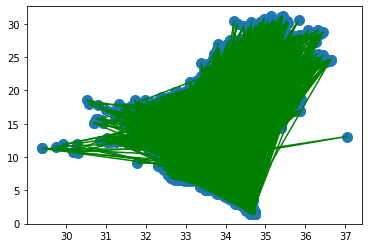

In [129]:
# Plot a graph to show Multiple Linear Regression Model
import operator
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
plt.scatter(X_train, y_train, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,y_pred), key=sort_axis)
X_test, y_pred = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
plt.show()

4. Which regression approach had the “best” performance? Be sure to compare it to what you did last week.

From the above performance both linear regression and multiple linear regression are almost same but relatively we see there is
a bit increase in the value from 22.3 to 22.8 using ultiple linear regression.

5. Work with the diabetes dataset to perform multiple logistic regression.

In [131]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The objective is to predict the number of patients who has diabetes based on diagnostic measurements

In [132]:
# lets check the dimensions of the DataFrame.
diabetes_df.shape

(768, 9)

In [133]:
# we can extract the features and label arrays rom the dataframe using iloc[]

X = diabetes_df.iloc[:,:-1].values
y = diabetes_df.iloc[:,-1].values

In [134]:
# we can calculate the proportion of observations that are actually diabetic in the dataframe
print(np.mean(y==1))

0.3489583333333333


we can infer that roughly 35% of the individuals represented in the dataset are in fact diabetic.

In [135]:
# split the data into train set and test set using sklearn.model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

In [136]:
# Now we can create our logistic regression classifier using sklearn

lrm = LogisticRegression(solver='lbfgs', penalty='none', max_iter=2000)
lrm.fit(X_train, y_train)

np.set_printoptions(suppress=True)
print("Intercept:     ", lrm.intercept_)
print("Coefficients:  ", lrm.coef_)

Intercept:      [-8.46745846]
Coefficients:   [[ 0.15019089  0.03328279 -0.01633804 -0.0013968   0.00010002  0.09492983
   1.06170184  0.01660607]]


In [137]:
# We use the model's score() method to calculate its accuracy on the training and test sets.

train_acc = lrm.score(X_train, y_train)
test_acc = lrm.score(X_test, y_test)

print("Training Accuracy: ", round(train_acc,3))
print("Test Accuracy: ", round(test_acc,3))

Training Accuracy:  0.786
Test Accuracy:  0.771


6.What are the other ways to assess the performance of the model besides accuracy? What approach makes the most sense with the diabetes dataset? Why?

In [139]:
# Now we use our model to generate predictions for each of the first three observations in our test set.
pd.DataFrame(X_test[:3], columns=diabetes_df.columns[:-1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,131.0,66.0,40.0,0.0,34.3,0.196,22.0
1,0.0,165.0,90.0,33.0,680.0,52.3,0.427,23.0
2,7.0,102.0,74.0,40.0,105.0,37.2,0.204,45.0


In [140]:
# we can predict the Outcome of each of these obsevations using predict() method.

print('Predicted Labels:', lrm.predict(X_test[:10]))
print('Observed Labels: ', y_test[:10])

Predicted Labels: [0 1 0 0 0 0 1 0 0 0]
Observed Labels:  [1 0 0 0 0 1 0 0 1 0]


In [141]:
print(lrm.predict_proba(X_test[:3,]))

[[0.80409304 0.19590696]
 [0.20168179 0.79831821]
 [0.6857689  0.3142311 ]]


In [142]:
# we can display the confusion matrix, calculated on the test set
pred_test = lrm.predict(X_test)
conf_matrix = confusion_matrix(y_test, pred_test)
conf_matrix

array([[133,  17],
       [ 36,  45]], dtype=int64)

In [143]:
# we can predict model accuracy i.e, true positive, false positive, true negative, and false negative using confusion matrix.
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

In [146]:
# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("Accuracy", accuracy)

Accuracy 0.7705627705627706


Accuracy is the result of total number of all correct predictions divided by total number of diabetes_dataset. we got the accuracy 0.77 which is considered to be good.

We have other metrics such as sensitivity and specificity, which are more informative than accuracy to avoid false negatives more than false positives or vice versa

In [145]:
# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity", sensitivity)

sensitivity 0.5555555555555556


Sensitivity or Recall or True positive rate is the result of number of correct positive predictions divided by the total number of positives, and our model has 56% of the True positive rate, which indicates Diabetic.

In [147]:
# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity", specificity)

specificity 0.8866666666666667


Specificity or True negative rate is calculated as the number of correct negative predictions divided by the total number of 
negatives, and our model has 89% of the True negative rate which indicates non-diabetic.

In [148]:
# Finally we can check the classification report for our model based on the test set

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       150
           1       0.73      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



From the above classification Report we can suggests the following:

The model classifies someone as non-diabetic, it will be correct roughly 79% of the time.

The model classifies someone as diabetic, it will be correct roughly 73% of the time.

The model classify 83% of the individuals as non-diabetic.

The model classify 56% of the individuals as diabetic.

8.Is the KNN model or the multiple logistic regression model more performant for the diabetes dataset? How can you tell?

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)
print(y_predict)

[0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0
 1 0 0 1 1 0 1 1 0]


In [151]:
print(knn.score(X_test,y_test))

0.7272727272727273


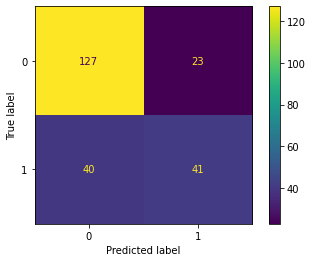

In [157]:
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plot_confusion_matrix(knn, X_test, y_test)

After Observing both Multiple logistic regression and knn model, Multiple logistic regression model performs better when compared to knn model, the accuracy scores for Multiple logistic regression is comparitively high i., nearly 79% whereas for knn it is 72% Also, by looking at the confusion matrix True Positive for Multiple logistic regression model is relatively high than knn and the false negative values for knn is relatively greater than loistic model hence logistic model is better with the diabetics dataset.